##Redimensionamento de imagem usando SVD

Estamos no capítulo 7.5.4

Nome: Matheus Rodrigues da Silva Espalaor

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
try:
    from PIL import Image
except ModuleNotFoundError:
    %pip install -qq pillow
    from PIL import Image
import requests
import io
from IPython.display import display


In [30]:
#CÓDIGO RETIRADO DO: svd_image_demo.ipynb dos autores

r = requests.get('https://github.com/probml/probml-data/blob/main/data/clown.png?raw=true', stream=True)
img = Image.open(io.BytesIO(r.content))

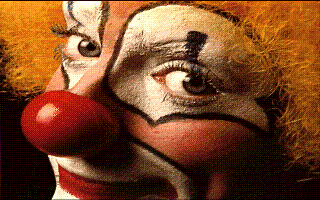

In [41]:
#Vamos converter para gray
img_np = np.array(img) #Teste para podermos converter imagem para array
img2 = np.array(Image.fromarray(img_np).convert('L')) #converter array para imagem

#plt.imshow(img2, cmap='gray')
img2 = Image.fromarray(img2)
img2

In [ ]:

def convert_PILIMAGE_cv2(img):
  img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
  return cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

In [59]:
img_hist = img
#img_hist_cv2 = convert_PILIMAGE_cv2(img_hist)

#img_hist_cv2 = img_hist_cv2.astype(np.float64)
U, s, V = np.linalg.svd(img_np, full_matrices=True)

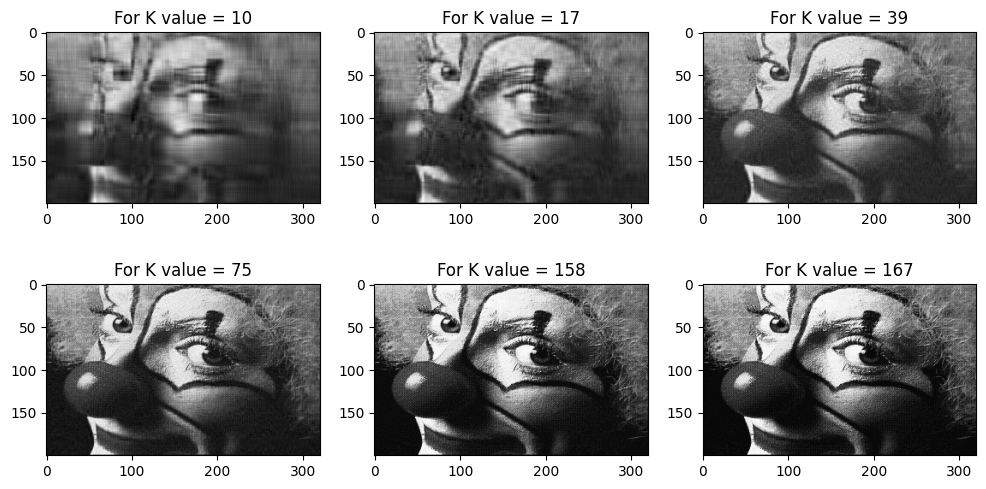

In [76]:
r = np.linalg.matrix_rank(img_np)
k_values = [i for i in np.random.randint(1, r, 6)]
k_values.sort()


plt.figure(figsize=(12,6))

for i in range(len(k_values)):
    x_hat = np.dot(np.dot(U[:, :k_values[i]], np.diag(s[:k_values[i]])), V[:k_values[i], :])
    plt.subplot(2,3,i+1),
    plt.imshow(x_hat, cmap='gray'),
    plt.title(f"For K value = {k_values[i]}")

plt.show()

Conseguimos perceber a perda e ganho de qualidade da imagem


A gente sempre consegue visualizar que, quando pegamos os primeiros valores de sigma, vemos a melhora da imagem.

Claro que quando a gente pega mais valores, mais pesado a imagem fica.

Então podemos perceber uma relação entre peso da imagem e sua qualidade.
